In [1]:
import os
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# load eeci_colors from csv
colors_file = 'eeci_colors.csv'
with open (colors_file, 'r') as f:
    reader = csv.reader(f)
    eeci_colors = reader.__next__()

In [3]:
comp_results_file = os.path.join('..','results', 'prediction_tests_baseline.csv')
comp_results = pd.read_csv(comp_results_file)
de_results_file = os.path.join('..','results', 'prediction_tests_data_efficiency.csv')
de_results = pd.read_csv(de_results_file)

In [4]:
print(de_results)

     Model Name   Train Building  Forecast Time (s)  Tau (hrs)   Metric  \
0   linear-rd4y  same-train-test          25.194979         48   gmnMAE   
1   linear-rd4y  same-train-test          25.194979         48  gmnRMSE   
2   linear-rd2y  same-train-test          24.039610         48   gmnMAE   
3   linear-rd2y  same-train-test          24.039610         48  gmnRMSE   
4   linear-rd1y  same-train-test          23.730632         48   gmnMAE   
5   linear-rd1y  same-train-test          23.730632         48  gmnRMSE   
6   linear-rd6m  same-train-test          23.022696         48   gmnMAE   
7   linear-rd6m  same-train-test          23.022696         48  gmnRMSE   
8   linear-rd3m  same-train-test          23.720555         48   gmnMAE   
9   linear-rd3m  same-train-test          23.720555         48  gmnRMSE   
10  resmlp-rd4y  same-train-test          67.669290         48   gmnMAE   
11  resmlp-rd4y  same-train-test          67.669290         48  gmnRMSE   
12  resmlp-rd2y  same-tra

In [5]:
comp_models = ['linear', 'conv', 'resmlp', 'TFT', 'NHiTS', 'DeepAR']
model_names = ['Linear', 'Conv', 'ResMLP', 'TFT', 'NHiTS', 'DeepAR']
UCam_ids = [0,3,9,11,12,15,16,25,26,32,38,44,45,48,49]
columns = ['P','C','S',*['L%s'%id for id in UCam_ids]]
rds = ['rd4y','rd2y','rd1y','rd6m','rd3m']
rd_years = [4,2,1,0.5,0.25]

## Plot mean improvement in prediction performance over all variables as volume of training data changes

P [ 0.          6.06899919  3.05161574 12.96216943  9.86652127  2.48196649]
C [  0.           2.31301858   0.33890414   0.69972808  -2.08673098
 -14.68294464]
S [ 0.         -1.20236761 -1.39524285 -1.36285113 -4.61010981 -9.12028799]
L0 [  0.          -5.46083314  -5.5166535  -18.00319577  -3.5167452
  -9.03799633]
L3 [  0.           1.11163251  -1.57098784  -1.0989787   -6.70764887
 -21.14284909]
L9 [  0.           0.50664166   1.3098154  -17.53938548 -15.55540783
  -7.29174878]
L11 [ 0.         -1.34133837 -0.37855769 -5.69861313 -1.43164333 -9.365779  ]
L12 [  0.          -1.7332936   -0.58894202  -2.26620391  -5.11946337
 -19.5211517 ]
L15 [  0.           1.60115892   3.96769738   1.55958555 -12.44138829
 -18.87254303]
L16 [ 0.          5.180939    8.02883512  8.4340402   3.84392392 -2.60426228]
L25 [ 0.         -3.45594531 -0.41881322 -4.16408409  0.69877432 -4.7109906 ]
L26 [  0.          -2.67706184  -0.21549831 -10.36350928  -6.98341633
 -22.01719122]
L32 [ 0.          0.78444

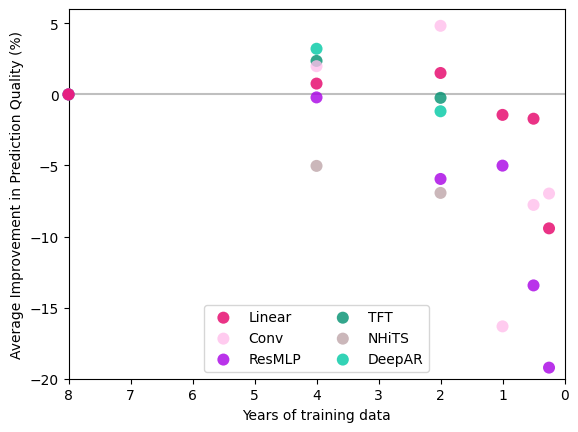

In [6]:
for metric, metric_name in zip(['gmnRMSE'],['nRMSE']):
    results = {}
    fig, ax = plt.subplots()
    ax.hlines([0], 0, 8, color='k', alpha=0.25)
    for i,model in enumerate(comp_models):
        xs = [8,*rd_years]
        ys = []
        results[model] = {}
        for var in columns:
            baseline_value = comp_results[(comp_results['Model Name']==model) & (comp_results['Metric']==metric)][var].iloc[0]
            var_ys = [baseline_value]
            for rd in rds:
                if (model+'-'+rd) in de_results['Model Name'].to_list():
                    y = de_results[(de_results['Model Name']==model+'-'+rd) & (de_results['Metric']==metric)][var].iloc[0]
                    if y == np.inf:
                        y = np.nan
                    var_ys.append(y)
            var_ys = (1 - np.array(var_ys)/baseline_value)*100
            results[model][var] = var_ys
            if model == 'linear':
                print(var, var_ys)
            ys.append(var_ys)
        ys = np.nanmean(np.array(ys), axis=0)
        print(model, ys)
        ax.scatter(
            xs[:len(ys)], ys,
            label=model_names[i], zorder=len(comp_models)-i, clip_on=False,
            color=eeci_colors[i], alpha=0.8, edgecolors='none',s=75
        )
    plt.xlim(8,0)
    plt.ylim(-20,6)
    plt.xlabel('Years of training data')
    plt.ylabel('Average Improvement in Prediction Quality (%)')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2, fancybox=True)
    plt.show()

In [7]:
print(results['linear'])
print(np.mean([results['linear'][var] for var in results['linear'] if 'L' in var],axis=0))

{'P': array([ 0.        ,  6.06899919,  3.05161574, 12.96216943,  9.86652127,
        2.48196649]), 'C': array([  0.        ,   2.31301858,   0.33890414,   0.69972808,
        -2.08673098, -14.68294464]), 'S': array([ 0.        , -1.20236761, -1.39524285, -1.36285113, -4.61010981,
       -9.12028799]), 'L0': array([  0.        ,  -5.46083314,  -5.5166535 , -18.00319577,
        -3.5167452 ,  -9.03799633]), 'L3': array([  0.        ,   1.11163251,  -1.57098784,  -1.0989787 ,
        -6.70764887, -21.14284909]), 'L9': array([  0.        ,   0.50664166,   1.3098154 , -17.53938548,
       -15.55540783,  -7.29174878]), 'L11': array([ 0.        , -1.34133837, -0.37855769, -5.69861313, -1.43164333,
       -9.365779  ]), 'L12': array([  0.        ,  -1.7332936 ,  -0.58894202,  -2.26620391,
        -5.11946337, -19.5211517 ]), 'L15': array([  0.        ,   1.60115892,   3.96769738,   1.55958555,
       -12.44138829, -18.87254303]), 'L16': array([ 0.        ,  5.180939  ,  8.02883512,  8.4340402

## Plot absolute prediction performance as volume of training data changes

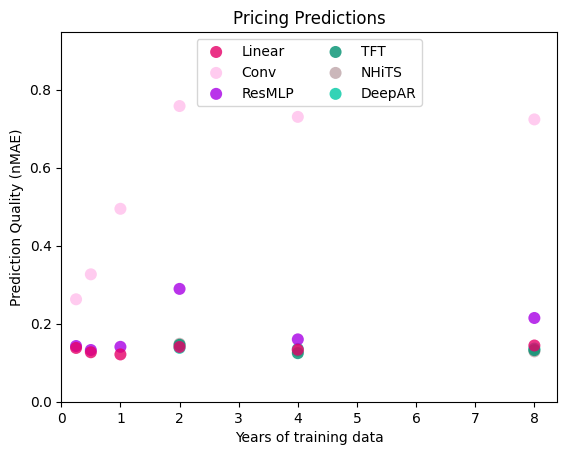

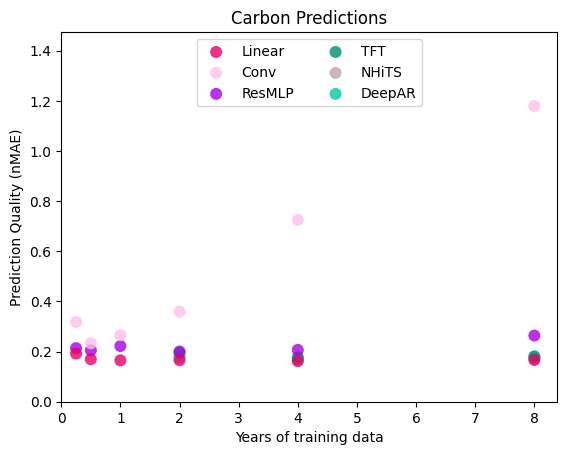

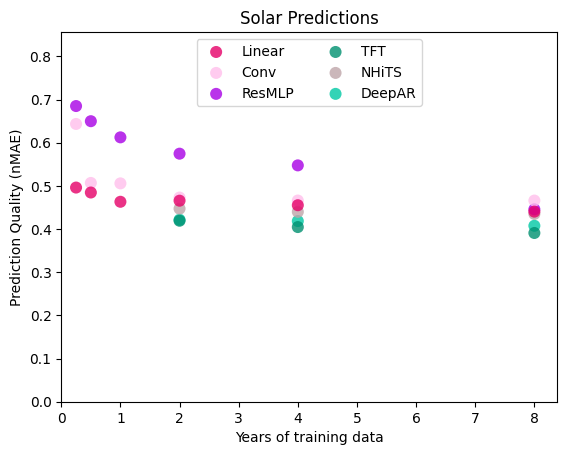

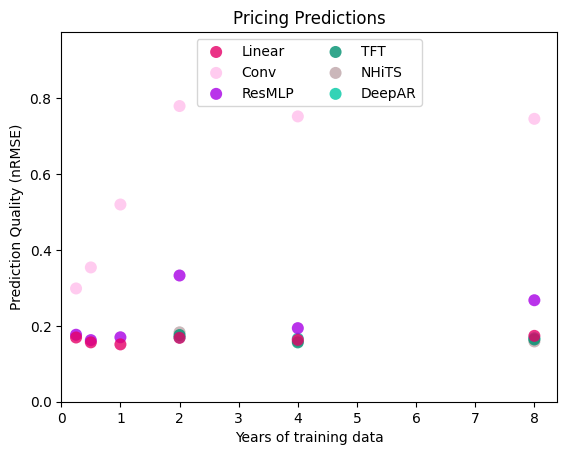

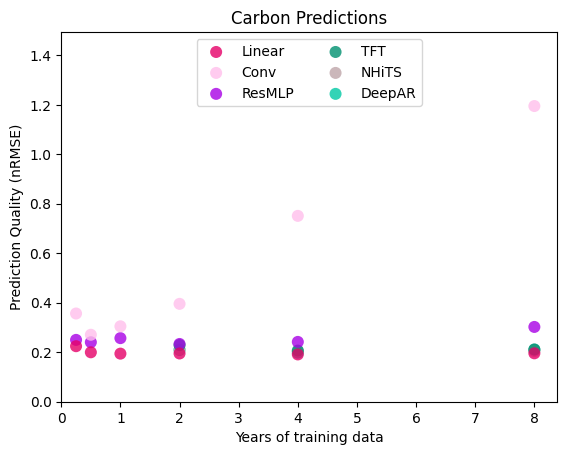

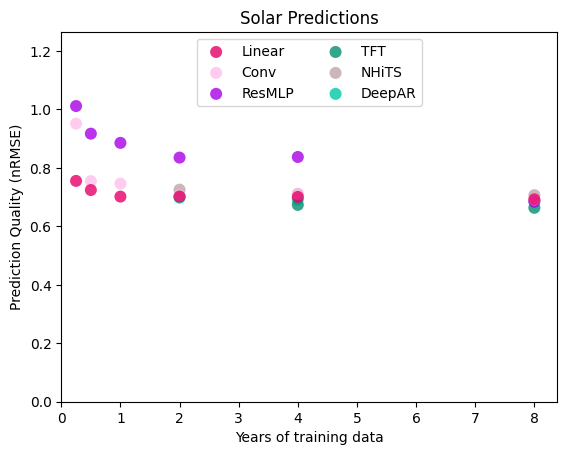

In [8]:
for metric, metric_name in zip(['gmnMAE','gmnRMSE'],['nMAE','nRMSE']):
    for var,var_name in zip(['P','C','S'],['Pricing','Carbon','Solar']):
        all_ys = []
        fig, ax = plt.subplots()
        for i,model in enumerate(comp_models):
            xs = [8,*rd_years]
            ys = [comp_results[(comp_results['Model Name']==model) & (comp_results['Metric']==metric)][var].iloc[0]] + [de_results[(de_results['Model Name']==model+'-'+rd) & (de_results['Metric']==metric)][var].iloc[0] for rd in rds if (model+'-'+rd) in de_results['Model Name'].to_list()]
            all_ys.extend(ys)
            ax.scatter(
                xs[:len(ys)], ys,
                label=model_names[i], zorder=len(comp_models)-i,
                color=eeci_colors[i], alpha=0.8, edgecolors='none',s=75
            )
        plt.xlim(0)
        plt.ylim(0,max(all_ys)*1.25)
        plt.xlabel('Years of training data')
        plt.ylabel(f'Prediction Quality ({metric_name})')
        plt.title('%s Predictions'%var_name)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, fancybox=True)
        plt.show()

## Plot relative prediction performance as volume of training data changes

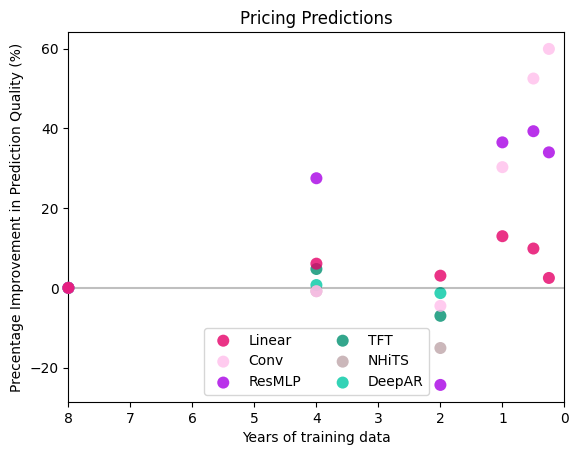

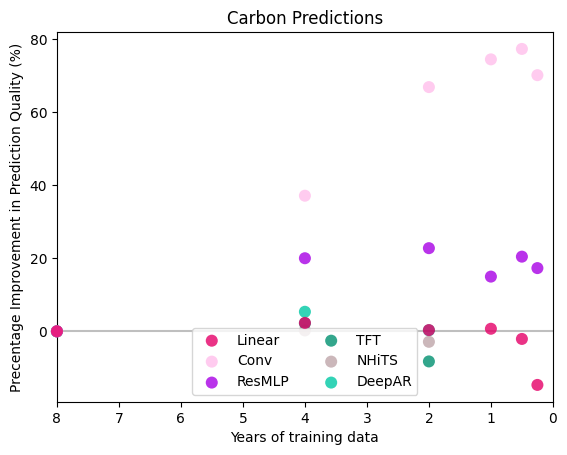

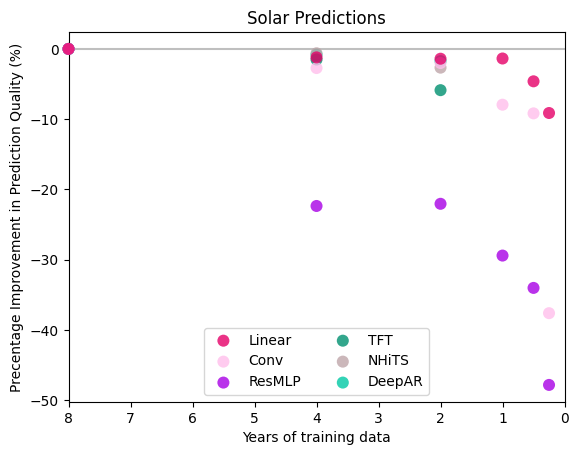

In [9]:
for metric, metric_name in zip(['gmnRMSE'],['nRMSE']):
    for var,var_name in zip(['P','C','S'],['Pricing','Carbon','Solar']):
        all_ys = []
        fig, ax = plt.subplots()
        ax.hlines([0], 0, 8, color='k', alpha=0.25)
        for i,model in enumerate(comp_models):
            xs = [8,*rd_years]
            baseline_value = comp_results[(comp_results['Model Name']==model) & (comp_results['Metric']==metric)][var].iloc[0]
            ys = np.array([baseline_value] + [de_results[(de_results['Model Name']==model+'-'+rd) & (de_results['Metric']==metric)][var].iloc[0] for rd in rds if (model+'-'+rd) in de_results['Model Name'].to_list()])
            ys = (1 - ys/baseline_value)*100
            all_ys.extend(ys)
            ax.scatter(
                xs[:len(ys)], ys,
                label=model_names[i], zorder=len(comp_models)-i, clip_on=False,
                color=eeci_colors[i], alpha=0.8, edgecolors='none',s=75
            )
        plt.xlim(8,0)
        #plt.ylim(-30,50)
        plt.xlabel('Years of training data')
        plt.ylabel('Precentage Improvement in Prediction Quality (%)')
        plt.title('%s Predictions'%var_name)
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2, fancybox=True)
        plt.show()

## Plot absolute prediction performance for load variables as volume of training data changes

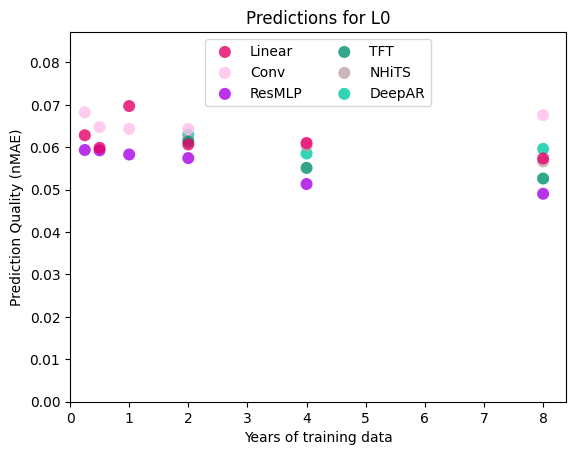

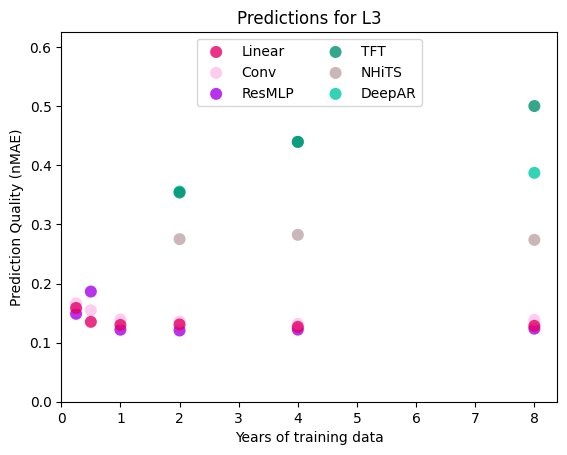

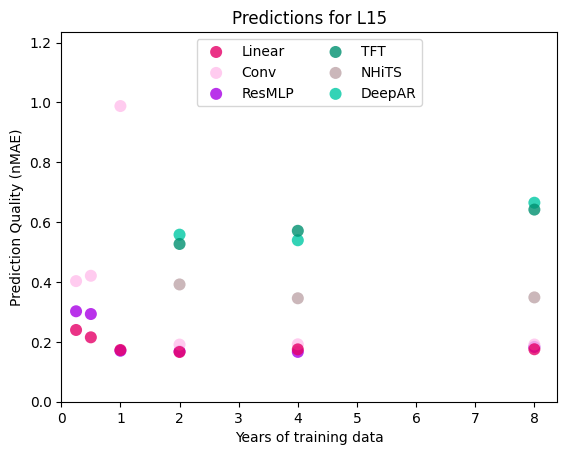

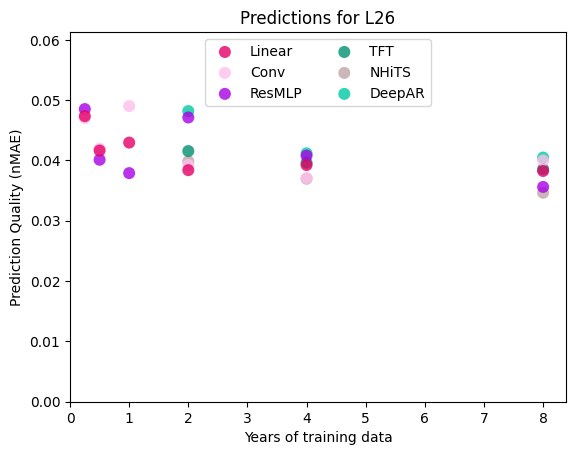

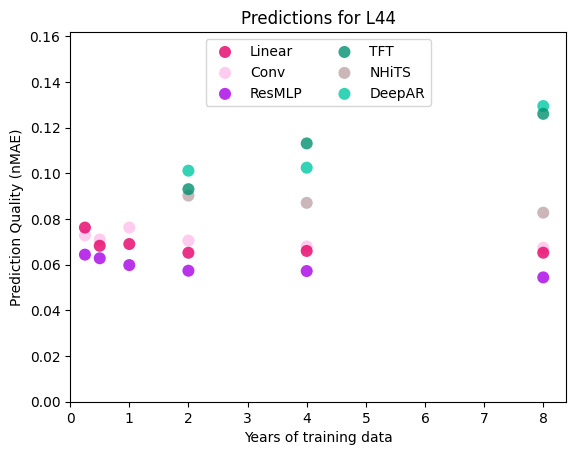

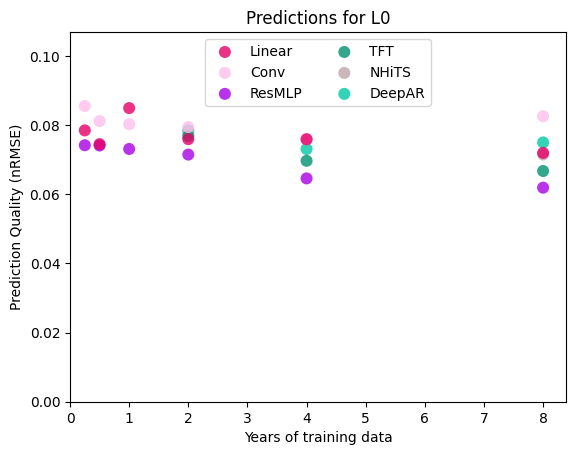

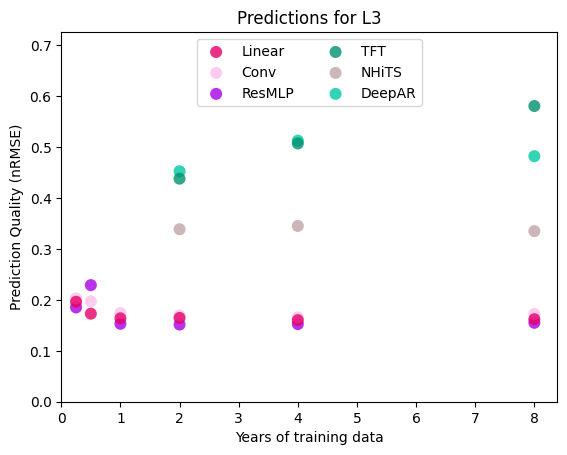

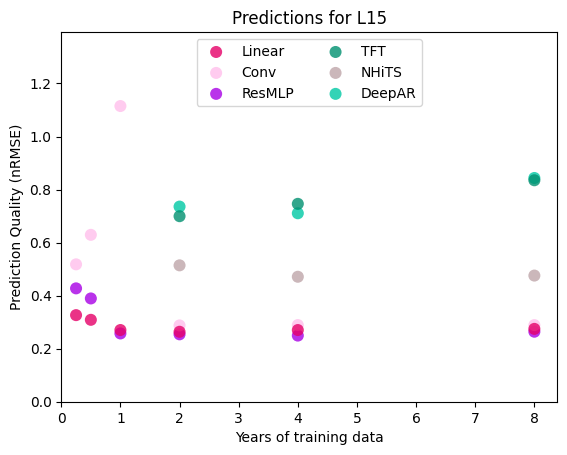

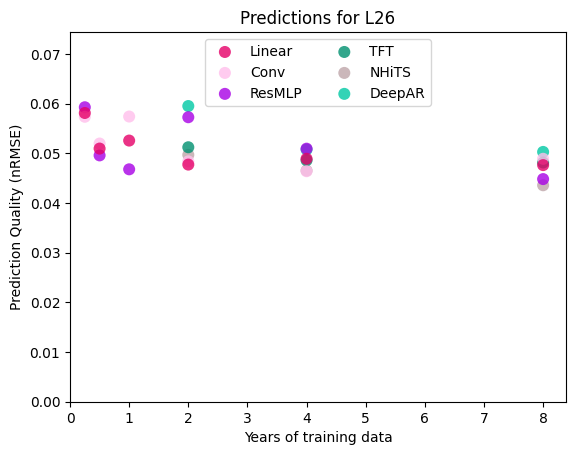

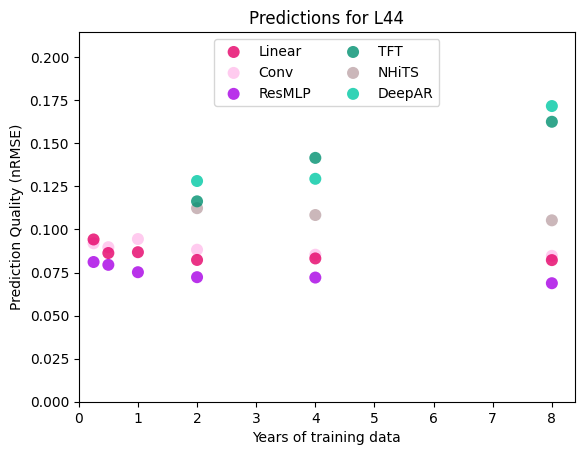

In [10]:
for metric, metric_name in zip(['gmnMAE','gmnRMSE'],['nMAE','nRMSE']):
    for var in ['L0','L3','L15','L26','L44']:
        all_ys = []
        fig, ax = plt.subplots()
        for i,model in enumerate(comp_models):
            xs = [8,*rd_years]
            ys = [comp_results[(comp_results['Model Name']==model) & (comp_results['Metric']==metric)][var].iloc[0]] + [de_results[(de_results['Model Name']==model+'-'+rd) & (de_results['Metric']==metric)][var].iloc[0] for rd in rds if (model+'-'+rd) in de_results['Model Name'].to_list()]
            all_ys.extend(ys)
            ax.scatter(
                xs[:len(ys)], ys,
                label=model_names[i], zorder=len(comp_models)-i,
                color=eeci_colors[i], alpha=0.8, edgecolors='none',s=75
            )
        plt.xlim(0)
        plt.ylim(0,max(all_ys)*1.25)
        plt.xlabel('Years of training data')
        plt.ylabel(f'Prediction Quality ({metric_name})')
        plt.title('Predictions for %s'%var)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, fancybox=True)
        plt.show()